## Setup

In [ ]:
#pip install --upgrade git+https://github.com/keras-team/keras-cv -q

In [1]:
from tqdm.auto import tqdm
import tensorflow as tf
import keras

import keras_cv
from keras_cv import bounding_box
from keras_cv import visualization

2024-02-05 17:34:51.752103: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-05 17:34:51.958210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 17:34:51.958245: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 17:34:51.989597: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 17:34:52.056518: I tensorflow/core/platform/cpu_feature_guar

Using TensorFlow backend


In [2]:
tf.__version__

'2.15.0'

In [3]:
class_ids = [
    #"TV", "bed", "chair", "clock", "console", "consoleeeeee", "door", "fan", "light", "sofa", "switchboard", "table"
    "emptychair", "fullchair"
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [4]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xs_backbone_coco",  # We will use yolov8 small backbone with coco weights
    #trainable = False
)

2024-02-05 17:35:03.100763: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 17:35:03.218651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 17:35:03.218697: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 17:35:03.223489: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-05 17:35:03.223535: I external/local_xla/xla/stream_executor

In [5]:
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),
    bounding_box_format="xyxy",
    backbone=backbone,
    fpn_depth=1
)

In [6]:
yolo.load_weights("model-xs-test2-02042024-192805.h5")
#yolo = keras_cv.models.load("model.h5")

(1, 640, 640, 3)
1/1 [==============================] - 1s 667ms/step
{'boxes': <tf.RaggedTensor [[[83.913895, 1.6068726, 587.2868, 611.043]]]>, 'confidence': <tf.RaggedTensor [[0.42665192]]>, 'classes': <tf.RaggedTensor [[1.0]]>, 'num_detections': array([1], dtype=int32)}


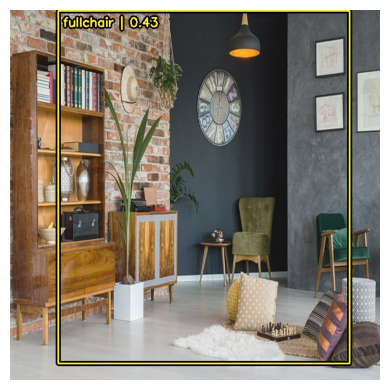

(1, 640, 640, 3)
1/1 [==============================] - 0s 242ms/step
{'boxes': <tf.RaggedTensor [[]]>, 'confidence': <tf.RaggedTensor [[]]>, 'classes': <tf.RaggedTensor [[]]>, 'num_detections': array([0], dtype=int32)}


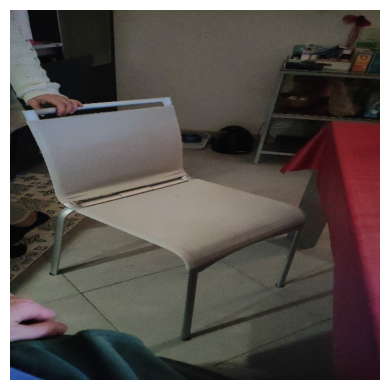

(1, 640, 640, 3)
1/1 [==============================] - 0s 243ms/step
{'boxes': <tf.RaggedTensor [[[62.915527, 4.614319, 561.527, 542.5171]]]>, 'confidence': <tf.RaggedTensor [[0.28979027]]>, 'classes': <tf.RaggedTensor [[1.0]]>, 'num_detections': array([1], dtype=int32)}


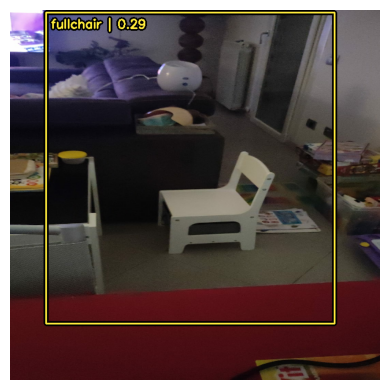

(1, 640, 640, 3)
1/1 [==============================] - 0s 249ms/step
{'boxes': <tf.RaggedTensor [[[60.21028, 27.474152, 456.4729, 559.0288],
  [115.45461, 61.011047, 403.5663, 543.6554],
  [246.67221, 46.85721, 645.24695, 546.5426]]]>, 'confidence': <tf.RaggedTensor [[0.37641457, 0.24469896, 0.20653474]]>, 'classes': <tf.RaggedTensor [[1.0, 1.0, 1.0]]>, 'num_detections': array([3], dtype=int32)}


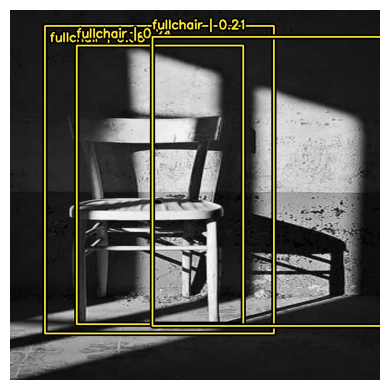

(1, 640, 640, 3)
1/1 [==============================] - 0s 241ms/step
{'boxes': <tf.RaggedTensor [[[164.58272, 40.168335, 442.74158, 579.2763]]]>, 'confidence': <tf.RaggedTensor [[0.62061983]]>, 'classes': <tf.RaggedTensor [[1.0]]>, 'num_detections': array([1], dtype=int32)}


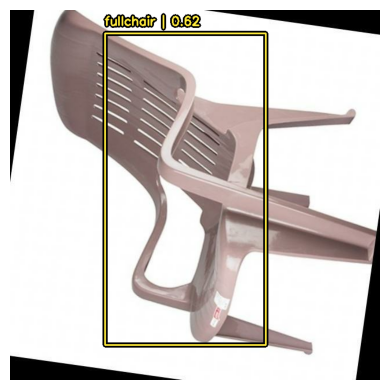

In [12]:
def visualize_generic(model, image_name, bounding_box_format):
    #images = load_image(os.path.join(path_images, image_name))
    image = tf.io.read_file(image_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [640,640])
    images = tf.cast(image, tf.float32)
    images = tf.expand_dims(images, axis=0)
    print(images.shape)

    y_pred = model.predict(images)
    y_pred = bounding_box.to_ragged(y_pred)
    print(y_pred)
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        #y_true={},
        y_pred=y_pred,
        scale=4,
        rows=1,
        cols=1,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )


visualize_generic(yolo, image_name="../test_images/testimage_1.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_2.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_3.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_4.jpg", bounding_box_format="xyxy")
visualize_generic(yolo, image_name="../test_images/testimage_5.jpg", bounding_box_format="xyxy")
#img_0120_jpg.rf.36da0f1b2f59ec13cb70e1b82defd9a0.jpg